,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


In [120]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Нормализуйте один из признаков

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_mm = MinMaxScaler()
df["MedInc_norm"] = scaler_mm.fit_transform(df[["MedInc"]])

df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_norm
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526,0.539668
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585,0.538027
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521,0.466028
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413,0.354699
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422,0.230776


In [122]:
X = df.drop(["MedHouseVal", "MedInc_norm"], axis=1)
y = df["MedHouseVal"]


def get_score(X, y, model=None, standartize=True):
    if model is None:
        model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    if standartize:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    if model == "DTR":
        model = DecisionTreeRegressor(max_depth=5, random_state=42)
        param_grid = {
            "max_depth": [3, 5, 7, 10, 15, 20, None],
            "min_samples_split": [2, 5, 10, 20, 50],
        }

        grid_search = GridSearchCV(
            estimator=model, param_grid=param_grid, cv=5, scoring="r2", verbose=1
        )

        grid_search.fit(X_train, y_train)

        model = grid_search.best_estimator_

    model = model.fit(X_train, y_train)

    score = model.score(X_test, y_test)

    return {"score": score, "model": model}


get_score(X, y)["score"]

0.6887770454209821

Обучите дерево решений на обучающем множестве.

In [123]:
get_score(X, y, model="DTR", standartize=False)["score"]

Fitting 5 folds for each of 35 candidates, totalling 175 fits


0.7349242145073457

Fitting 5 folds for each of 35 candidates, totalling 175 fits


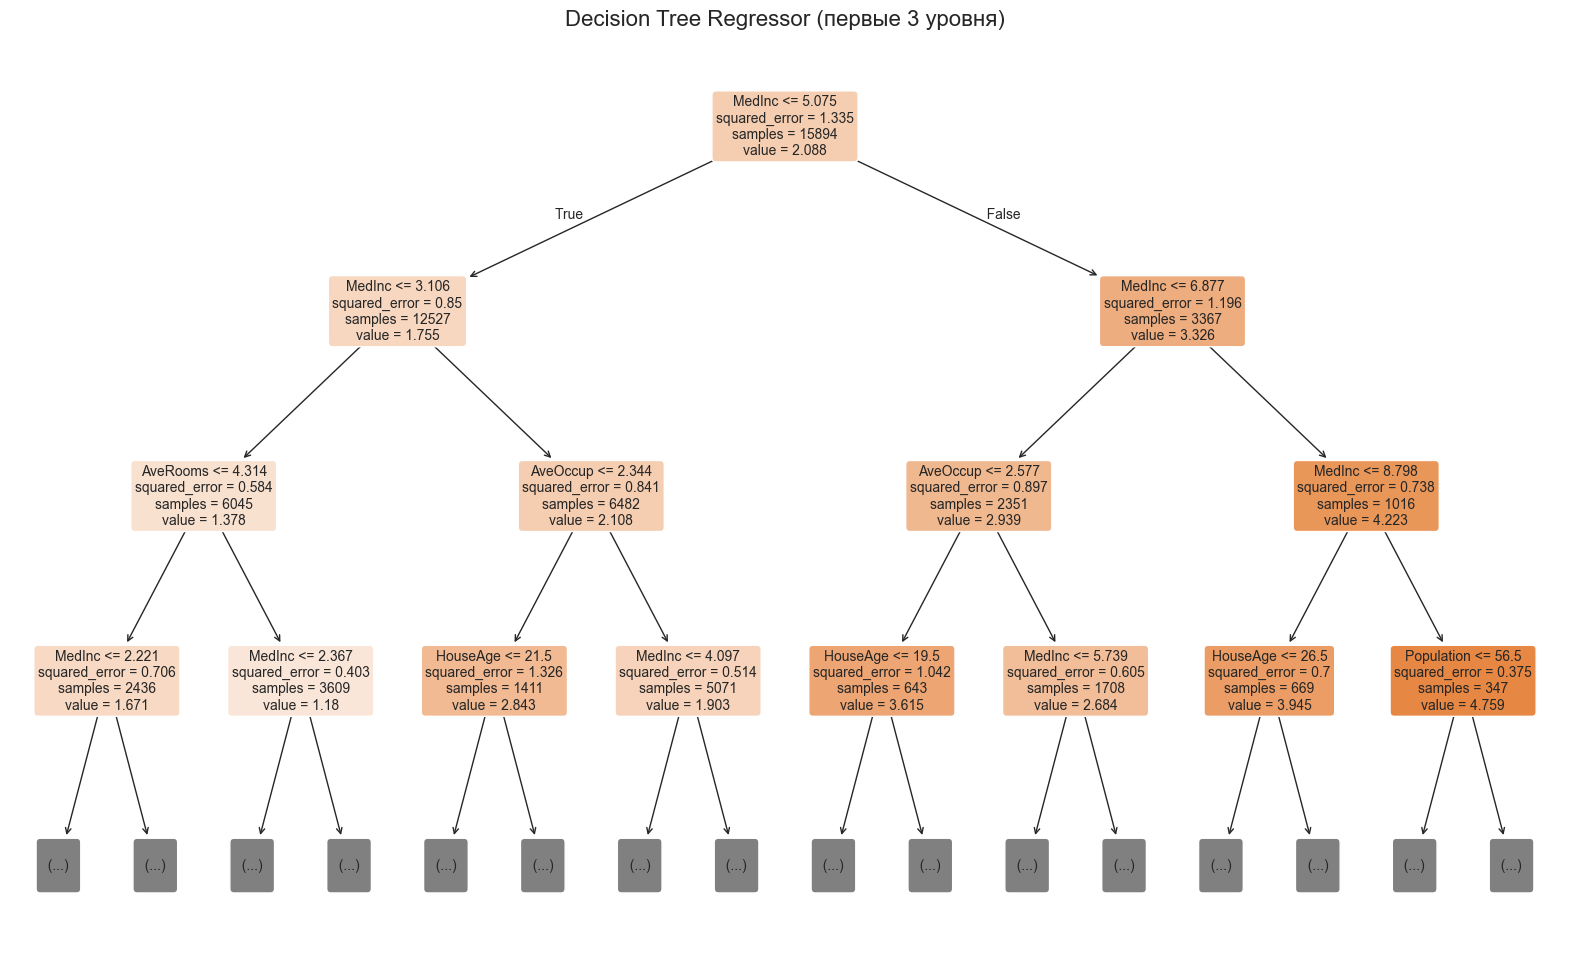

In [124]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(
    get_score(X, y, model="DTR", standartize=False)["model"],
    max_depth=3,
    feature_names=X.columns if hasattr(X, "columns") else None,
    filled=True,
    fontsize=10,
    rounded=True,
)
plt.title("Decision Tree Regressor (первые 3 уровня)", fontsize=16)
plt.show()